# Filters

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imBGR = cv2.imread('p4.png')
imRGB = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB) # change image pattern into RGB
imGRAY = cv2.cvtColor(imRGB, cv2.COLOR_RGB2GRAY) # change image pattern into Gray scale

imRGB_int16 = np.int16(imRGB) # extend values range by changing a data type into int-16-bit for further operation
imGRAY_int16 = np.int16(imGRAY)

# Linear Filter

## Box Filter

In [2]:
M = imGRAY.shape[1]
N = imGRAY.shape[0]
copy_box = imGRAY.copy()

## create smoothing filter
H_box = np.matrix([[0,0,0,0,0], [0,1,1,1,0], [0,1,1,1,0],[0,1,1,1,0],[0,0,0,0,0]])
s = 1/np.sum(H_box)
#H_linear = np.matrix([[0.075, 0.125, 0.075], [0.125, 0.200, 0.125], [0.075, 0.125, 0.075]])


# filter matrix of size(width x length): (2L+1)x(2K+1)  
box_filter_w = H_box.shape[0]; L = int((box_filter_w - 1)/2)
box_filter_l = H_box.shape[1]; K = int((box_filter_l - 1)/2)

for v in range(L,N-L):
    for u in range(K,M-K):
        sum_pix = 0
        for j in range(-L,L+1):
            for i in range(-K,K+1):
                p = s*H_box[i+K,j+L]*copy_box[v-i,u-j]
                sum_pix = sum_pix + p
        imGRAY[v,u] = sum_pix
imGRAY_box_fil = imGRAY
print(imGRAY_box_fil)


[[ 50  51  51 ... 132 152 166]
 [ 51  51  51 ... 136 154 160]
 [ 51  52  52 ... 130 139 138]
 ...
 [169 181 202 ... 116  93  80]
 [177 188 199 ... 104 102 102]
 [226 225 224 ... 161 155 133]]


In [3]:
print(copy_box)

[[ 50  51  51 ... 132 152 166]
 [ 51  51  51 ... 136 154 160]
 [ 51  52  52 ... 131 139 138]
 ...
 [169 181 194 ...  93  93  80]
 [177 188 199 ... 104 102 102]
 [226 225 224 ... 161 155 133]]


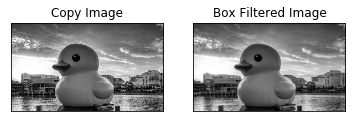

In [4]:
plt.subplot(2,2,1),plt.imshow(copy_box, 'gray')
plt.title("Copy Image"), plt.xticks([]),plt.yticks([])
plt.subplot(2,2,2),plt.imshow(imGRAY_box_fil, 'gray')
plt.title("Box Filtered Image"), plt.xticks([]),plt.yticks([])
plt.show()

In [5]:
cv2.imwrite('gray.png',copy_box)
cv2.imwrite('gray_box_fil.png',imGRAY_box_fil)

True

## Gaussian Filter

In [6]:
orig = copy_box
M = orig.shape[1]
N = orig.shape[0]
copy_gauss = orig.copy()

## create Gauss filter
H_gauss = np.matrix([[0,1,2,1,0], [1,3,5,3,1], [2,5,9,5,2],[1,3,5,3,1],[0,1,2,1,0]])
s = 1/np.sum(H_gauss)

# filter matrix of size(width x length): (2L+1)x(2K+1)  
gauss_filter_w = H_gauss.shape[0]; L = int((gauss_filter_w - 1)/2)
gauss_filter_l = H_gauss.shape[1]; K = int((gauss_filter_l - 1)/2)

for v in range(L,N-L):
    for u in range(K,M-K):
        sum_pixx = 0
        for j in range(-L,L+1):
            for i in range(-K,K+1):
                pp = s*H_gauss[i+K,j+L]*copy_gauss[v-i,u-j]
                sum_pixx = sum_pixx + pp
        orig[v,u] = sum_pixx
imGRAY_gauss_fil = orig
print(imGRAY_gauss_fil)


[[ 50  51  51 ... 132 152 166]
 [ 51  51  51 ... 136 154 160]
 [ 51  52  52 ... 131 139 138]
 ...
 [169 181 201 ... 114  93  80]
 [177 188 199 ... 104 102 102]
 [226 225 224 ... 161 155 133]]


In [7]:
print(copy_gauss)

[[ 50  51  51 ... 132 152 166]
 [ 51  51  51 ... 136 154 160]
 [ 51  52  52 ... 131 139 138]
 ...
 [169 181 194 ...  93  93  80]
 [177 188 199 ... 104 102 102]
 [226 225 224 ... 161 155 133]]


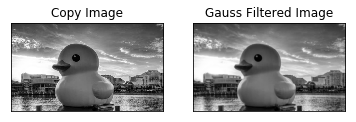

In [8]:
plt.subplot(2,2,1),plt.imshow(copy_gauss, 'gray')
plt.title("Copy Image"), plt.xticks([]),plt.yticks([])
plt.subplot(2,2,2),plt.imshow(imGRAY_gauss_fil, 'gray')
plt.title("Gauss Filtered Image"), plt.xticks([]),plt.yticks([])
plt.show()

In [9]:
cv2.imwrite('gray_gauss_fil.png',imGRAY_gauss_fil)

True

## Nonlinear Filter

## Median Filter

In [10]:
orig1 = copy_gauss
M = orig1.shape[1]
N = orig1.shape[0]
copy_median = orig1.copy()

#filter region = 3x3
for v in range(1,N-1):
    for u in range(1,M-1):
        fil = list([])
        for j in range(-1,2):
            for i in range(-1,2):
                fil.append(copy_median[v-i,u-j])
        fil.sort()
        orig1[v,u] = fil[4]
imGRAY_median_fil = orig1
print(imGRAY_median_fil)


[[ 50  51  51 ... 132 152 166]
 [ 51  51  52 ... 132 139 160]
 [ 51  52  52 ... 128 136 138]
 ...
 [169 194 199 ... 104 102  80]
 [177 194 199 ... 104 102 102]
 [226 225 224 ... 161 155 133]]


In [11]:
print(copy_median)

[[ 50  51  51 ... 132 152 166]
 [ 51  51  51 ... 136 154 160]
 [ 51  52  52 ... 131 139 138]
 ...
 [169 181 194 ...  93  93  80]
 [177 188 199 ... 104 102 102]
 [226 225 224 ... 161 155 133]]


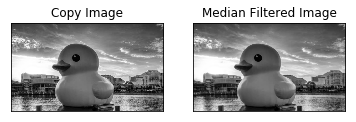

In [12]:
plt.subplot(2,2,1),plt.imshow(copy_median, 'gray')
plt.title("Copy Image"), plt.xticks([]),plt.yticks([])
plt.subplot(2,2,2),plt.imshow(imGRAY_median_fil, 'gray')
plt.title("Median Filtered Image"), plt.xticks([]),plt.yticks([])
plt.show()

In [13]:
cv2.imwrite('gray_median_fil.png',imGRAY_median_fil)

True